# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

  Using cached citipy-0.0.6.tar.gz (675 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675977 sha256=a5f1f5728fdf7541ebf7d67dcdb4804dff12665711ba2c1ffe7dded92d8b2fe6
  Stored in directory: c:\users\rjisn\appdata\local\pip\cache\wheels\4b\b5\88\49107ff846ec6967b34c17d369176c591fc90ed93b706755ad
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [33]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [34]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cedral
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | ulanhot
Processing Record 4 of Set 1 | utrik
Processing Record 5 of Set 1 | opuwo
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | petropavlovsk-kamchatsky
Processing Record 8 of Set 1 | mazara del vallo
Processing Record 9 of Set 1 | tanki leendert
City not found. Skipping...
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | ust-nera
Processing Record 13 of Set 1 | talnakh
Processing Record 14 of Set 1 | invercargill
Processing Record 15 of Set 1 | berezovyy
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | tshikapa
Processing Record 18 of Set 1 | kruisfontein
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | nyurba
Processing Record 21 of Set 1 | semnan
Processi

Processing Record 37 of Set 4 | hauterive
Processing Record 38 of Set 4 | weno
Processing Record 39 of Set 4 | khanbari
Processing Record 40 of Set 4 | riberalta
Processing Record 41 of Set 4 | tamanrasset
Processing Record 42 of Set 4 | nar'yan-mar
Processing Record 43 of Set 4 | constantia
Processing Record 44 of Set 4 | vadso
Processing Record 45 of Set 4 | dudinka
Processing Record 46 of Set 4 | luderitz
Processing Record 47 of Set 4 | kuanda
Processing Record 48 of Set 4 | betio village
Processing Record 49 of Set 4 | noumea
Processing Record 0 of Set 5 | nakamura
Processing Record 1 of Set 5 | vilyuysk
Processing Record 2 of Set 5 | namibe
Processing Record 3 of Set 5 | san luis de la loma
Processing Record 4 of Set 5 | prokhladnyy
Processing Record 5 of Set 5 | celikhan
Processing Record 6 of Set 5 | kone
Processing Record 7 of Set 5 | lakatoro
Processing Record 8 of Set 5 | tolanaro
Processing Record 9 of Set 5 | celestun
Processing Record 10 of Set 5 | ta`u
Processing Record 1

Processing Record 27 of Set 8 | al jumum
Processing Record 28 of Set 8 | tromso
Processing Record 29 of Set 8 | port douglas
Processing Record 30 of Set 8 | port augusta
Processing Record 31 of Set 8 | lufilufi
Processing Record 32 of Set 8 | hirson
Processing Record 33 of Set 8 | konstantinovka
Processing Record 34 of Set 8 | mardin
Processing Record 35 of Set 8 | mangrol
Processing Record 36 of Set 8 | berdigestyakh
Processing Record 37 of Set 8 | port macquarie
Processing Record 38 of Set 8 | likiep
Processing Record 39 of Set 8 | vrangel'
Processing Record 40 of Set 8 | harstad
Processing Record 41 of Set 8 | ciudad lazaro cardenas
Processing Record 42 of Set 8 | lihue
Processing Record 43 of Set 8 | buka
Processing Record 44 of Set 8 | west helena
Processing Record 45 of Set 8 | zhangjiakou shi xuanhua qu
Processing Record 46 of Set 8 | bengkulu
Processing Record 47 of Set 8 | metlili chaamba
Processing Record 48 of Set 8 | ampara
Processing Record 49 of Set 8 | usogorsk
Processin

Processing Record 17 of Set 12 | tbeng meanchey
Processing Record 18 of Set 12 | rudsar
Processing Record 19 of Set 12 | kayangel
Processing Record 20 of Set 12 | aykhal
Processing Record 21 of Set 12 | siwa oasis
Processing Record 22 of Set 12 | andalgala
Processing Record 23 of Set 12 | monterey
Processing Record 24 of Set 12 | skara
Processing Record 25 of Set 12 | thames
Processing Record 26 of Set 12 | zaozersk
Processing Record 27 of Set 12 | urangan
Processing Record 28 of Set 12 | huancavelica
Processing Record 29 of Set 12 | vanino
Processing Record 30 of Set 12 | labytnangi
Processing Record 31 of Set 12 | ad dilam
Processing Record 32 of Set 12 | inhambane
Processing Record 33 of Set 12 | lesnoy
Processing Record 34 of Set 12 | natchez
Processing Record 35 of Set 12 | kralendijk
Processing Record 36 of Set 12 | turpan
Processing Record 37 of Set 12 | kindu
Processing Record 38 of Set 12 | alexander city
Processing Record 39 of Set 12 | pyay
Processing Record 40 of Set 12 | m

In [35]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [36]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cedral,23.8000,-100.7333,16.38,85,91,3.09,MX,1699932594
1,waitangi,-43.9535,-176.5597,13.31,89,4,9.38,NZ,1699932595
2,ulanhot,46.0833,122.0833,2.57,32,2,2.30,CN,1699932334
3,utrik,11.2278,169.8474,28.09,81,100,7.99,MH,1699932594
4,opuwo,-18.0607,13.8400,24.51,26,53,0.96,NA,1699932569


In [37]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [38]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cedral,23.8000,-100.7333,16.38,85,91,3.09,MX,1699932594
1,waitangi,-43.9535,-176.5597,13.31,89,4,9.38,NZ,1699932595
2,ulanhot,46.0833,122.0833,2.57,32,2,2.30,CN,1699932334
3,utrik,11.2278,169.8474,28.09,81,100,7.99,MH,1699932594
4,opuwo,-18.0607,13.8400,24.51,26,53,0.96,NaN,1699932569


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

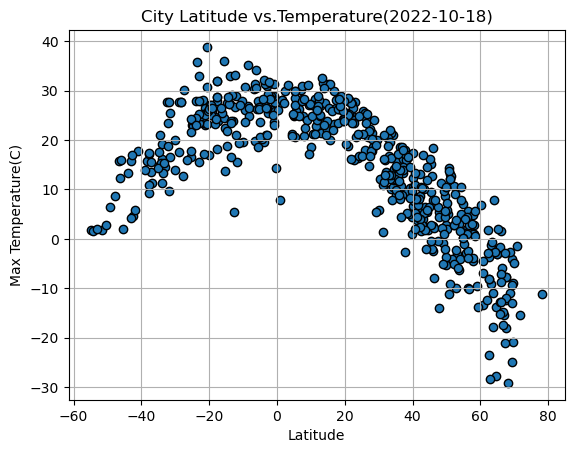

In [39]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Latitude vs.Temperature(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

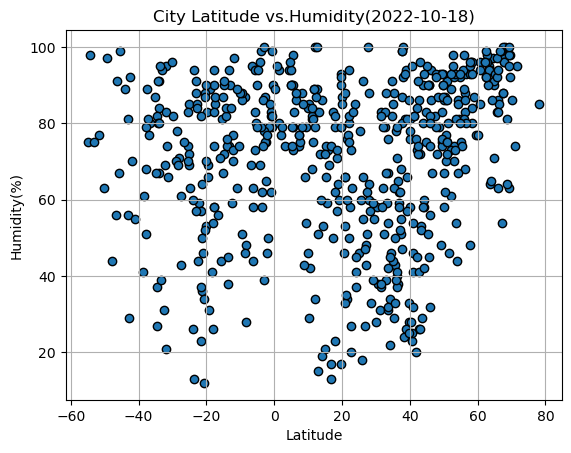

In [40]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs.Humidity(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

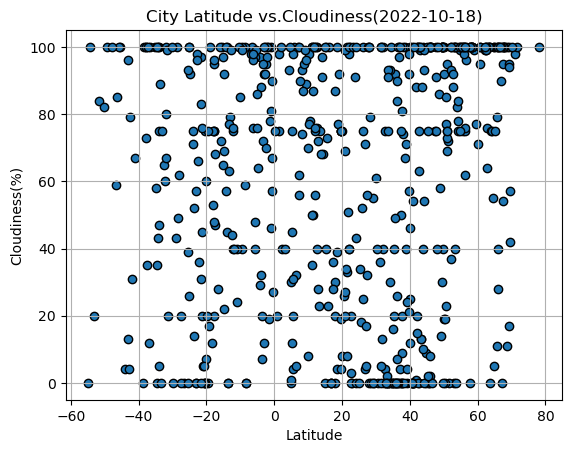

In [41]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs.Cloudiness(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

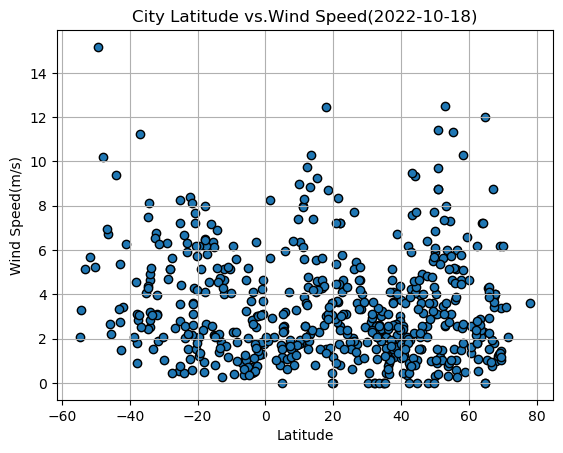

In [42]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('City Latitude vs.Wind Speed(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis,eq_loc):  
    correlation = st.pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    p_fit = p_slope * x_axis + p_int
    eq= f"y ={p_slope: .2f}x +{ p_int: .2f}"
    
#Plot the line
    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,p_fit,"--", color='red')
    plt.annotate(eq, eq_loc, fontsize=12, color='red')
    print(f"The r-value between {x_axis.name} and {y_axis.name} is {round(correlation[0],2)}")

In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cedral,23.8000,-100.7333,16.38,85,91,3.09,MX,1699932594
2,ulanhot,46.0833,122.0833,2.57,32,2,2.30,CN,1699932334
3,utrik,11.2278,169.8474,28.09,81,100,7.99,MH,1699932594
6,petropavlovsk-kamchatsky,53.0452,158.6483,-3.08,74,0,12.52,RU,1699932597
7,mazara del vallo,37.6641,12.5880,17.97,87,9,3.65,IT,1699932597


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,13.31,89,4,9.38,NZ,1699932595
4,opuwo,-18.0607,13.8400,24.51,26,53,0.96,NaN,1699932569
5,adamstown,-25.0660,-130.1015,23.01,85,100,8.28,PN,1699932556
8,blackmans bay,-43.0167,147.3167,15.85,56,13,5.39,AU,1699932564
9,ushuaia,-54.8000,-68.3000,1.81,75,0,2.06,AR,1699932324


###  Temperature vs. Latitude Linear Regression Plot

The r-value between Lat and Max Temp is -0.89


Text(0, 0.5, 'Temperature(C)')

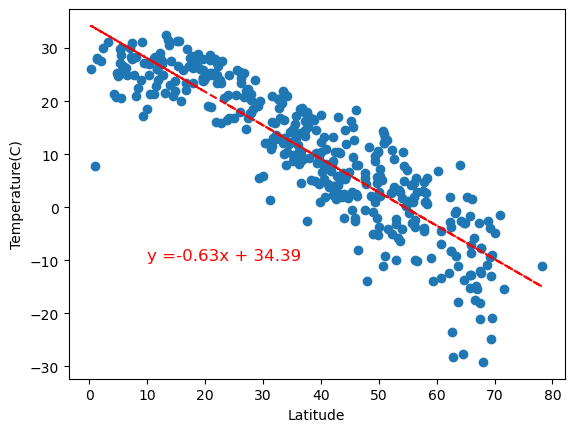

In [46]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],(10, -10))
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')

The r-value between Lat and Max Temp is 0.69


Text(0, 0.5, 'Temperature(C)')

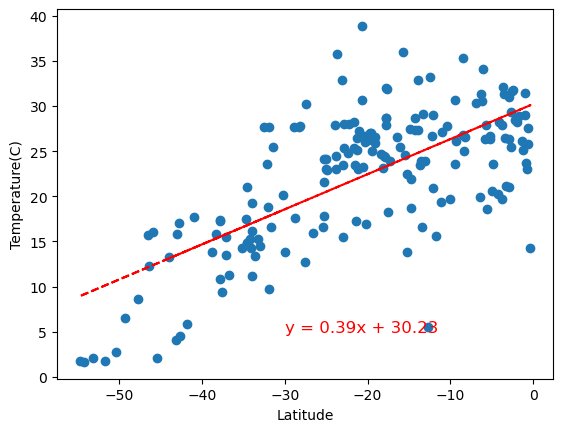

In [47]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],(-30, 5))
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')

**Discussion about the linear relationship:** There is a negative coorelation in the north, which suggest that the higher lattitude of the given city, the hotter the temp. 

### Humidity vs. Latitude Linear Regression Plot

The r-value between Lat and Humidity is 0.26


Text(0, 0.5, 'Humidity(%)')

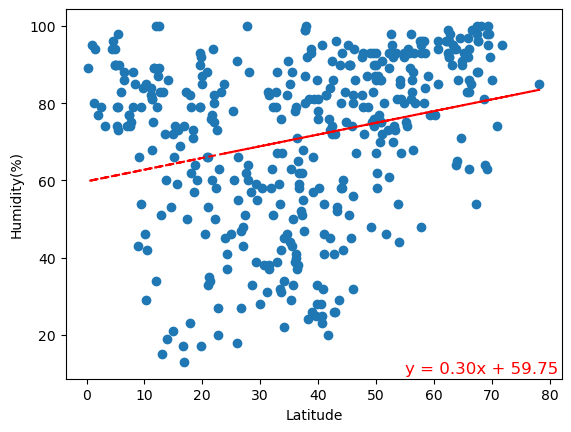

In [48]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],(55, 10))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

The r-value between Lat and Humidity is 0.06


Text(0, 0.5, 'Humidity(%)')

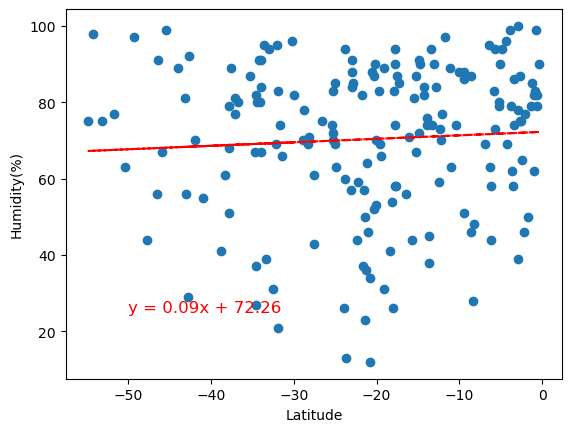

In [49]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(-50, 25))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

**Discussion about the linear relationship:** The cities humidy increses extremely slowly as the latitude increases.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value between Lat and Cloudiness is 0.2


Text(0, 0.5, 'Cloudiness(%)')

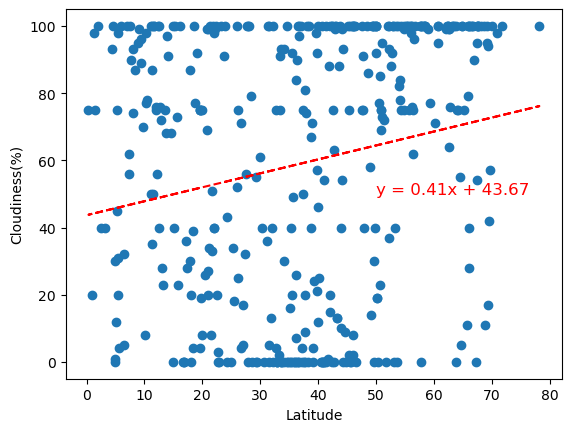

In [50]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(50, 50))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

The r-value between Lat and Cloudiness is 0.07


Text(0, 0.5, 'Cloudiness(%)')

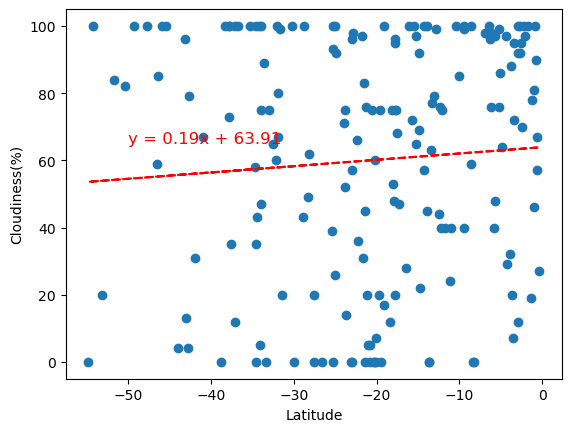

In [51]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(-50, 65))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

**Discussion about the linear relationship:** There doesn't seem to be much correlation when we compare the north to the south.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value between Lat and Wind Speed is -0.01


Text(0, 0.5, 'Wind Speed(m/s)')

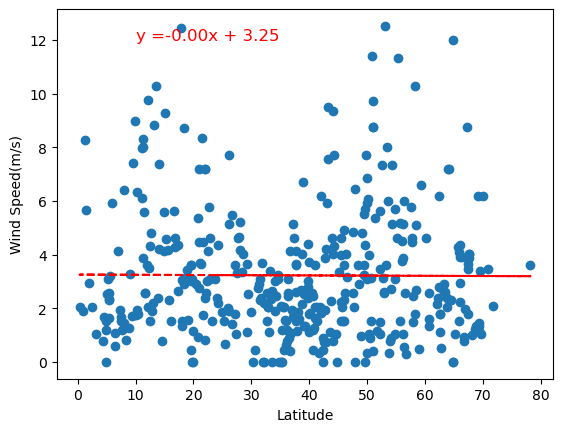

In [52]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],(10, 12))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

The r-value between Lat and Wind Speed is -0.34


Text(0, 0.5, 'Wind Speed(m/s)')

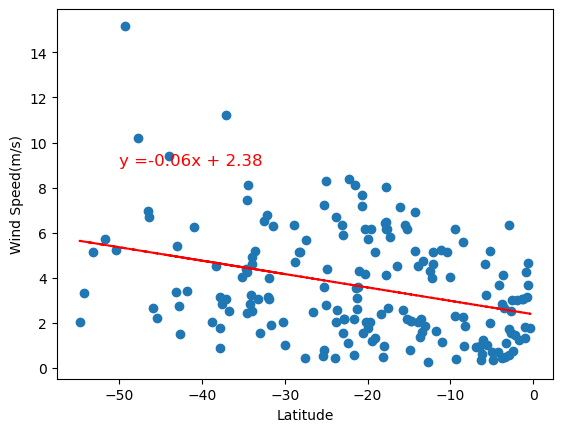

In [53]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],(-50, 9))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

**Discussion about the linear relationship:** The north has little to no correlation. In the south, the correlation is higher, but still minimul to almost none.